## Assignment-16-Neural_Networks gas turbines

In [2]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt

In [3]:
turbines = pd.read_csv('gas_turbines.csv')
turbines

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [4]:
turbines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [5]:
# split data into(X) and (Y) variables
df1 = turbines.drop("TEY" , axis=1)
df1

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,10.533,6.2494,93.227


In [6]:
finalDf = pd.concat([pd.DataFrame(df1),
                     turbines[['TEY']]], axis = 1)
finalDf

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX,TEY
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722,114.70
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776,114.72
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468,114.71
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670,114.72
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311,114.72
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,10.400,4.5186,79.559,111.61
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,10.433,4.8470,79.917,111.78
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,10.483,7.9632,90.912,110.19
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,10.533,6.2494,93.227,110.74


In [7]:
# split data into(X) and (Y) variables

array = finalDf.values
X = array[:,0:10]
Y = array[:,10]

X.reshape(-1,1)
Y.reshape(-1,1)

array([[114.7 ],
       [114.72],
       [114.71],
       ...,
       [110.19],
       [110.74],
       [111.58]])

In [8]:
# create model
model= Sequential()
model.add(Dense(12, input_dim=10, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [9]:
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')

In [10]:
# Fit the model
history = model.fit(X, Y, validation_split=0.3, epochs=150, batch_size=10)

Epoch 1/150
1053/1053 [==============================] - 5s 4ms/step - loss: 18594.0898 - val_loss: 17470.8789
Epoch 2/150
1053/1053 [==============================] - 4s 4ms/step - loss: 18594.1016 - val_loss: 17470.8789
Epoch 3/150
1053/1053 [==============================] - 4s 4ms/step - loss: 18594.1016 - val_loss: 17470.8789
Epoch 4/150
1053/1053 [==============================] - 4s 4ms/step - loss: 18594.0996 - val_loss: 17470.8789
Epoch 5/150
1053/1053 [==============================] - 4s 4ms/step - loss: 18594.1133 - val_loss: 17470.8789
Epoch 6/150
1053/1053 [==============================] - 4s 4ms/step - loss: 18594.0957 - val_loss: 17470.8789
Epoch 7/150
1053/1053 [==============================] - 4s 4ms/step - loss: 18594.0859 - val_loss: 17470.8789
Epoch 8/150
1053/1053 [==============================] - 4s 4ms/step - loss: 18594.0996 - val_loss: 17470.8789
Epoch 9/150
1053/1053 [==============================] - 4s 4ms/step - loss: 18594.0996 - val_loss: 17470.8789
E

1053/1053 [==============================] - 4s 4ms/step - loss: 18594.0898 - val_loss: 17470.8789
Epoch 75/150
1053/1053 [==============================] - 4s 4ms/step - loss: 18594.1055 - val_loss: 17470.8789
Epoch 76/150
1053/1053 [==============================] - 4s 4ms/step - loss: 18594.0820 - val_loss: 17470.8789
Epoch 77/150
1053/1053 [==============================] - 4s 4ms/step - loss: 18594.1074 - val_loss: 17470.8789
Epoch 78/150
1053/1053 [==============================] - 4s 4ms/step - loss: 18594.0977 - val_loss: 17470.8789
Epoch 79/150
1053/1053 [==============================] - 4s 4ms/step - loss: 18594.1016 - val_loss: 17470.8789
Epoch 80/150
1053/1053 [==============================] - 4s 4ms/step - loss: 18594.0879 - val_loss: 17470.8789
Epoch 81/150
1053/1053 [==============================] - 4s 4ms/step - loss: 18594.1152 - val_loss: 17470.8789
Epoch 82/150
1053/1053 [==============================] - 4s 4ms/step - loss: 18594.0820 - val_loss: 17470.8789
Epoch

Epoch 147/150
1053/1053 [==============================] - 4s 4ms/step - loss: 18594.0918 - val_loss: 17470.8789
Epoch 148/150
1053/1053 [==============================] - 4s 4ms/step - loss: 18594.0977 - val_loss: 17470.8789
Epoch 149/150
1053/1053 [==============================] - 4s 4ms/step - loss: 18594.0801 - val_loss: 17470.8789
Epoch 150/150
1053/1053 [==============================] - 4s 3ms/step - loss: 18594.0859 - val_loss: 17470.8789


In [11]:
# evaluate the model
scores= model.evaluate(X,Y)

470/470 [==============================] - 1s 3ms/step - loss: 18257.1094


<function matplotlib.pyplot.show(close=None, block=None)>

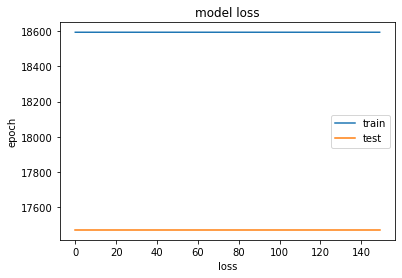

In [12]:
# summarize history for loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('loss')
plt.ylabel('epoch')
plt.legend(['train', 'test'])
plt.show